In [2]:
from PIL import Image
from pylab import *

im = array(Image.open('/Users/stephaniexia/Documents/didi/yinyuehui.jpg'))
print(im.shape, im.dtype)
im = array(Image.open('/Users/stephaniexia/Documents/didi/yinyuehui.jpg').convert('L'),'f')
print(im.shape, im.dtype)

(972, 1452, 3) uint8
(972, 1452) float32


0 255
0 255
100 200
0 255


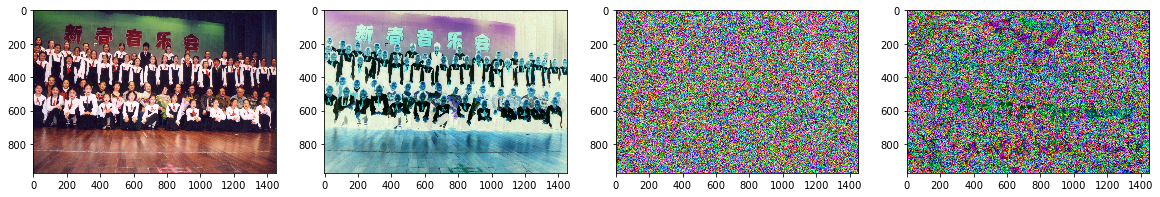

In [13]:
from numpy import *
figure(figsize=(20,3))
subplot(141)
im = array(Image.open('/Users/stephaniexia/Documents/didi/yinyuehui.jpg'))
print(int(im.min()), int(im.max()))
imshow(im)

subplot(142)
im2 = 255 - im  # invert image
print(int(im2.min()), int(im2.max()))
imshow(im2)

subplot(143)
im3 = (100/255) * im + 100  # clamp to interval 100...200
print(int(im3.min()), int(im3.max()))
imshow(im3)

subplot(144)
im4 = 255.0 * (im/255.0)**2  # squared
print(int(im4.min()), int(im4.max()))
imshow(im4)

4 255
0 251
101 200
0 255


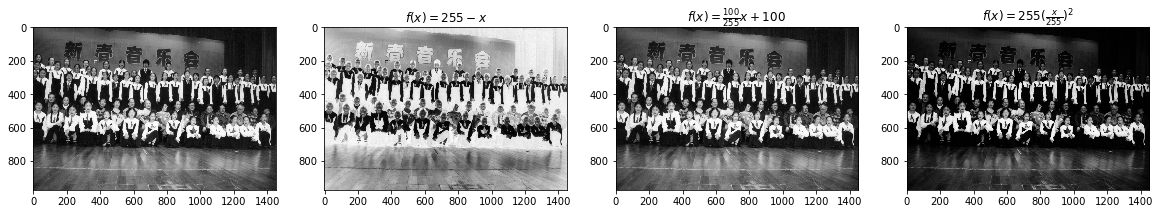

In [15]:
# gray:

from numpy import *
figure(figsize=(20,3))
gray()
subplot(141)
im = array(Image.open('/Users/stephaniexia/Documents/didi/yinyuehui.jpg').convert('L'))
print(int(im.min()), int(im.max()))
imshow(im)

subplot(142)
im2 = 255 - im  # invert image
print(int(im2.min()), int(im2.max()))
title(r'$f(x)=255-x$')
imshow(im2)

subplot(143)
im3 = (100/255) * im + 100  # clamp to interval 100...200
print(int(im3.min()), int(im3.max()))
title(r'$f(x)=\frac{100}{255}x+100$')
imshow(im3)

subplot(144)
im4 = 255.0 * (im/255.0)**2  # squared
print(int(im4.min()), int(im4.max()))
title(r'$f(x)=255(\frac{x}{255})^2$')
imshow(im4)

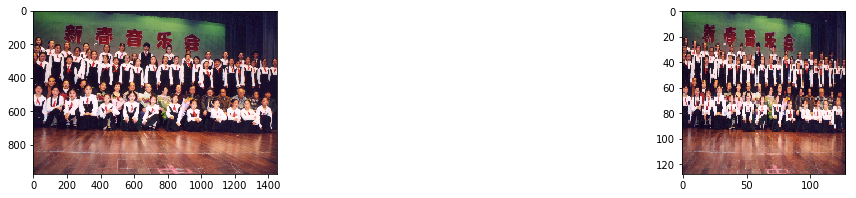

In [17]:
#resize:
#numpy hasn't method for resizing array:
#call pil_im:

def imresize(im,sz):
    """    Resize an image array using PIL. """
    pil_im = Image.fromarray(uint8(im))

    return array(pil_im.resize(sz))

im = array(Image.open('/Users/stephaniexia/Documents/didi/yinyuehui.jpg'))
figure(figsize=(20,3))
subplot(121)
imshow(im)

size = 128,128
subplot(122)
im_resize = imresize(im,size)
imshow(im_resize)


In [18]:
#图像均衡化作为预处理操作，在归一化图像强度时是一个很好的方式，并且通过直方图均衡化可以增加图像对比度。

def histeq(im,nbr_bins=256):
    """    Histogram equalization of a grayscale image. """
    
    # get image histogram
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)
    
    return im2.reshape(im.shape), cdf

In [58]:
im = array(Image.open('/Users/stephaniexia/Documents/didi/yinyuehui.jpg').convert('L'))
im_hisequal, cdf = histeq(im)
print(len(cdf))

256


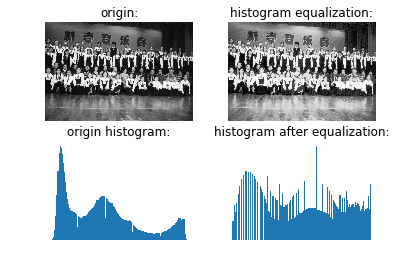

In [30]:
figure()
subplot(2, 2, 1)
axis('off')
gray()
title('origin:')
imshow(im)

subplot(2, 2, 2)
axis('off')
title('histogram equalization:')
imshow(im_hisequal)

subplot(2, 2, 3)
axis('off')
title('origin histogram:')
#hist(im.flatten(), 128, cumulative=True, normed=True)
hist(im.flatten(), 128, normed=True)

subplot(2, 2, 4)
axis('off')
title('histogram after equalization:')
#hist(im2.flatten(), 128, cumulative=True, normed=True)
hist(im_hisequal.flatten(), 128, normed=True)

show()

In [35]:
#对图像取平均是一种图像降噪的简单方法，经常用于产生艺术效果。
#假设所有的图像具有相同的尺寸，我们可以对图像相同位置的像素相加取平均，下面是一个演示对图像取平均的例子：

import os
def get_imlist(path):
    """    Returns a list of filenames for 
        all jpg images in a directory. """
        
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.JPG')]

filelist = get_imlist('/Users/stephaniexia/Documents/didi/sing/')
print(filelist)

['/Users/stephaniexia/Documents/didi/sing/1831.JPG', '/Users/stephaniexia/Documents/didi/sing/1830.JPG', '/Users/stephaniexia/Documents/didi/sing/1832.JPG', '/Users/stephaniexia/Documents/didi/sing/1833.JPG', '/Users/stephaniexia/Documents/didi/sing/1834.JPG']


In [43]:
def compute_average(imlist):
    """    Compute the average of a list of images. """
    
    # open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), 'f') 

    skipped = 0
    
    for imname in imlist[1:]:
        try: 
            averageim += array(Image.open(imname))
        except:
            print(imname + "...skipped")  
            imlist.remove(imname)
            skipped += 1

    averageim /= (len(imlist) - skipped)
    
    # return average as uint8
    return array(averageim, 'uint8'), imlist

avg, imlist = compute_average(filelist)

/Users/stephaniexia/Documents/didi/sing/1830.JPG...skipped
/Users/stephaniexia/Documents/didi/sing/1832.JPG...skipped
/Users/stephaniexia/Documents/didi/sing/1833.JPG...skipped


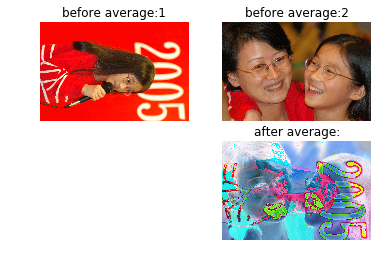

In [45]:
for impath in filelist:
        im1 = array(Image.open(impath))
        subplot(2, 2, filelist.index(impath)+1)
        imshow(im1)
        imNum=str(filelist.index(impath)+1)
        title('before average:'+imNum)
        axis('off')
subplot(2, 2, 4)
imshow(avg)
title('after average:')
axis('off')

show()

In [56]:
#TODO：

print(imlist)
im = array(Image.open(imlist[0]))
m, n = im.shape[:2]# get the size of the image
print(m,n)
# Create matrix to store all flattened images
immatrix = array([array(Image.open(imname)).flatten() for imname in imlist], 'f')
print(immatrix.shape)

def pca(X):
    """    Principal Component Analysis
        input: X, matrix with training data stored as flattened arrays in rows
        return: projection matrix (with important dimensions first), variance and mean.
    """
    
    # get dimensions
    num_data,dim = X.shape
    
    # center data
    mean_X = X.mean(axis=0)
    X = X - mean_X
    
    if dim>num_data:
        # PCA - compact trick used
        M = dot(X,X.T) # covariance matrix
        e,EV = linalg.eigh(M) # eigenvalues and eigenvectors
        tmp = dot(X.T,EV).T # this is the compact trick
        V = tmp[::-1] # reverse since last eigenvectors are the ones we want
        S = sqrt(e)[::-1] # reverse since eigenvalues are in increasing order
        for i in range(V.shape[1]):
            V[:,i] /= S
    else:
        # PCA - SVD used
        U,S,V = linalg.svd(X)
        V = V[:num_data] # only makes sense to return the first num_data
    
    # return the projection matrix, the variance and the mean
    return V,S,mean_X
V, S, immean = pca(immatrix)
print(V)
print(V.shape)
print(immean.shape)

# PCA降维

['/Users/stephaniexia/Documents/didi/sing/1831.JPG', '/Users/stephaniexia/Documents/didi/sing/1834.JPG']
2000 3008
(2, 18048000)


/Users/stephaniexia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/stephaniexia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


[[ -4.94038046e-04   1.16518413e-05   1.16518413e-05 ...,  -5.31323953e-04
   -5.12680999e-05   5.12680999e-05]
 [             inf              inf              inf ...,              inf
               inf             -inf]]
(2, 18048000)
(18048000,)


"\nfor i in range(7):\n    subplot(2, 4, i+2)\n    imshow(V[i].reshape(m, n))\n    axis('off')\nshow()\n"

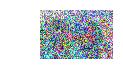

In [57]:


figure()
gray()
subplot(2, 4, 1)
axis('off')
imshow(immean.reshape(m, n,3))
'''
for i in range(7):
    subplot(2, 4, i+2)
    imshow(V[i].reshape(m, n))
    axis('off')
show()
'''